<a href="https://colab.research.google.com/github/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/musica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **El ritmo de la música**
Este *dataset* está compuesto por canciones de 2017 con atributos de la API de Spotify. Cada canción ha sido etiquetada por alguien que usó "1", cuando le gusta la canción o "0" si no le gusta. 

Su tarea es construir un clasificador que pueda predecir las preferencias de los atributos de la canción.

Cada fila del *dataframe* representa una canción. Hay 16 columnas, 13 de las cuales son atributos de la canción, una columna para el nombre de la canción, una para el artista y una columna llamada "destino", que es la etiqueta mencionada anteriormente para la canción. Los atributos de la pista son: acústica, bailabilidad, duración, energía, instrumentalidad, clave, vivacidad, volumen, modo, habla, tempo, marca de tiempo, valencia (más información[aquí](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)).

In [16]:
import pandas as pd
#leemos el dataset
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv",index_col=0)
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Caracterización de variables

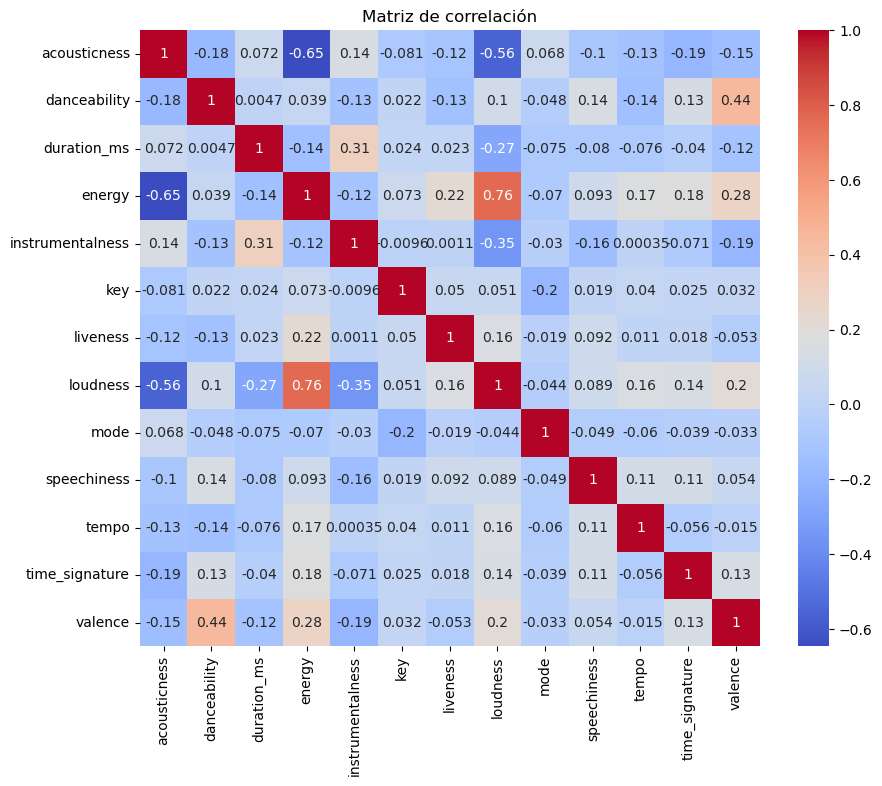

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df = df.drop(['target','song_title','artist'], axis=1)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['target','song_title','artist'], axis=1)
y = df['target']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
for col, imp in zip(X.columns, importances):
    print(f"{col}: {imp:.3f}")


acousticness: 0.091
danceability: 0.096
duration_ms: 0.092
energy: 0.094
instrumentalness: 0.131
key: 0.036
liveness: 0.064
loudness: 0.124
mode: 0.012
speechiness: 0.105
tempo: 0.072
time_signature: 0.005
valence: 0.078


In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['instrumentalness', 'loudness', 'speechiness', 'danceability', 'energy', 'duration_ms', 'acousticness']]
y = df['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# 2. Normalización: fit solo con train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# 3. PCA: fit solo con train
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)



# KNN

In [39]:
from sklearn import neighbors

In [55]:
# 4. Entrenar el modelo
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# 5. Evaluar
y_pred = knn.predict(X_valid_pca)

In [59]:
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy:", accuracy_score(y_valid, y_pred))
print("F1 Score:", f1_score(y_valid, y_pred))


Accuracy: 0.7075588599752168
F1 Score: 0.7057356608478803
